<a href="https://colab.research.google.com/github/is0280fp/google_colab/blob/main/Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
# from IPython.core.debugger import Pdb; Pdb().set_trace()
import csv
import tensorflow as tf
import functools
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
# import wave_func as wf

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_left.csv') as f:
    reader = csv.reader(f)
    V_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_right.csv') as f:
    reader = csv.reader(f)
    V_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_left.csv') as f:
    reader = csv.reader(f)
    AP_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_right.csv') as f:
    reader = csv.reader(f)
    AP_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_left.csv') as f:
    reader = csv.reader(f)
    ML_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_right.csv') as f:
    reader = csv.reader(f)
    ML_right = [row for row in reader]
f.close()

# with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_COP_AP_PRO_right.csv') as f:
#     reader = csv.reader(f)
#     COP_AP_right = [row for row in reader]
# f.close()

# with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_COP_AP_PRO_left.csv') as f:
#     reader = csv.reader(f)
#     COP_AP_left = [row for row in reader]
# f.close()

# with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_COP_ML_PRO_right.csv') as f:
#     reader = csv.reader(f)
#     COP_ML_right = [row for row in reader]
# f.close()

# with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_COP_ML_PRO_left.csv') as f:
#     reader = csv.reader(f)
#     COP_ML_left = [row for row in reader]
# f.close()

In [185]:
# データそれぞれの一番目の文字列を除去し、数字だけにした
V_right_items = np.array(V_right, dtype=str)[0,::]
V_right = np.array(V_right)[1:,::]
V_right = np.array(V_right, dtype=float)

V_left_items = np.array(V_left, dtype=str)[0,::]
V_left = np.array(V_left)[1:,::]
V_left = np.array(V_left, dtype=float)

AP_right_items = np.array(AP_right, dtype=str)[0,::]
AP_right = np.array(AP_right)[1:,::]
AP_right = np.array(AP_right, dtype=float)

AP_left_items = np.array(AP_left, dtype=str)[0,::]
AP_left = np.array(AP_left)[1:,::]
AP_left = np.array(AP_left, dtype=float)

ML_right_items = np.array(ML_right, dtype=str)[0,::]
ML_right = np.array(ML_right)[1:,::]
ML_right = np.array(ML_right, dtype=float)

ML_left_items = np.array(ML_left, dtype=str)[0,::]
ML_left = np.array(ML_left)[1:,::]
ML_left = np.array(ML_left, dtype=float) # ML_left.shape (75732, 104)

In [186]:
# GRFをV,AP,MLの順に横に並べる
# AFFECTED_SIDEによって横に並ぶ順番を決める
# trainとtestデータにわける

V_left = V_left[::,3::]
V_right = V_right[::,3::]
AP_left = AP_left[::,3::]
AP_right = AP_right[::,3::]
ML_left = ML_left[::,3::]
ML_right = ML_right[::,3::]

In [208]:
# upsampling 1000Hz
from scipy import interpolate
x_observed = range(101)
# y_observed = V_left[0]
resampled_V_left = []

x_latent = np.linspace(min(x_observed), max(x_observed), 1000)

# ip1 = ["1次スプライン補間", lambda x, y: interpolate.interp1d(x, y, kind="slinear")]
# ip2 = ["2次スプライン補間", lambda x, y: interpolate.interp1d(x, y, kind="quadratic")]
# ip3 = ["3次スプライン補間", lambda x, y: interpolate.interp1d(x, y, kind="cubic")]

# for method_name, method in [ip3]:
#     print(method_name)
#     fitted_curve = method(x_observed, y_observed)
#     plt.scatter(x_observed, y_observed, label="observed")
#     y= fitted_curve(x_latent)
#     plt.plot(x_latent, fitted_curve(x_latent), c="red", label="fitted")
#     plt.grid()
#     plt.legend()
#     plt.show()

for y_observed in V_left:
  fitted_curve = interpolate.interp1d(x_observed, y_observed, kind="cubic")
  # plt.scatter(x_observed, y_observed, label="observed")
  resampled_V_left.append(fitted_curve(x_latent))
  # plt.plot(x_latent, fitted_curve(x_latent), c="red", label="fitted")
  # plt.grid()
  # plt.legend()
  # plt.show()

resampled_V_left = np.array(resampled_V_left)

In [207]:
print(V_left[-1].max())
print(y.max())
print(V_left[-1].min())
print(y.min())
y = np.array(y).reshape(-1, 1)
print(y.shape)

1.16871306383306
1.1687992020754472
0.0372662591679964
0.0372662591679964
(1000, 1)


In [209]:
np.array(resampled_V_left).shape

(75732, 1000)

In [164]:
mmscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)
mmscaler.fit(y)           # 最大・最小を計算
y = mmscaler.transform(y) # 変換
y = y.reshape(-1)

In [107]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)
# mmscaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) 

mmscaler.fit(V_left)           # 最大・最小を計算
V_left = mmscaler.transform(V_left) # 変換
mmscaler.fit(V_right)           # 最大・最小を計算
V_right = mmscaler.transform(V_right) # 変換

mmscaler.fit(ML_left)           # 最大・最小を計算
ML_left = mmscaler.transform(ML_left) # 変換
mmscaler.fit(ML_right)           # 最大・最小を計算
ML_right = mmscaler.transform(ML_right) # 変換

mmscaler.fit(AP_left)           # 最大・最小を計算
AP_left = mmscaler.transform(AP_left) # 変換
mmscaler.fit(AP_right)           # 最大・最小を計算
AP_right = mmscaler.transform(AP_right) # 変換

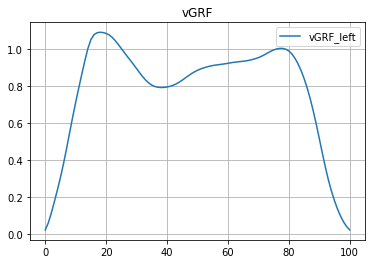

100%|██████████| 75/75 [00:00<00:00, 26419.15it/s]


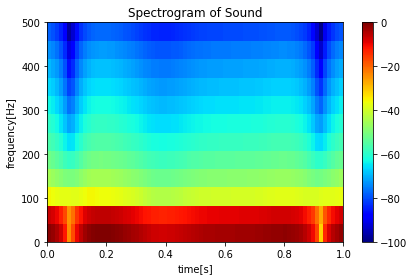

In [177]:
j = range(101)
plt.title('vGRF')
plt.grid(True)
# plt.plot(j, V_right[0], label="vGRF_right")
plt.plot(j, V_left[0], label="vGRF_left")
plt.legend(loc='best')
plt.show()

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# STFT (s: signal(1D-array), Lf: length of frame(window), noverlap: number of overlap)
def STFT(s, Lf, noverlap=None):
    if noverlap==None:
        noverlap = Lf//2
    l = s.shape[0]
    win = np.hanning(Lf)
    Mf = Lf//2 + 1
    Nf = int(np.ceil((l-noverlap)/(Lf-noverlap)))-1
    S = np.empty([Mf, Nf], dtype=np.complex128)
    for n in tqdm(range(Nf)):
        S[:,n] = np.fft.rfft(s[(Lf-noverlap)*n:(Lf-noverlap)*n+Lf] * win, n=Lf, axis=0)
    return S

# plot spectrogram (fs: sampling frequency, s: signal(1D-array), Lf: length of frame(window), noverlap: number of overlap)
def plot_spectrogram(fs, s,  Lf, noverlap=None):
    S = STFT(s, Lf, noverlap)
    S = S + 1e-18
    P = 20 * np.log10(np.abs(S))
    P = P - np.max(P) # normalization
    vmin = -100
    if np.min(P) > vmin:
        vmin = np.min(P)
    m = np.linspace(0, s.shape[0]/fs, num=P.shape[1])
    k = np.linspace(0, fs/2, num=P.shape[0])
    plt.figure()
    plt.pcolormesh(m, k, P, cmap = 'jet', vmin=-100, vmax=0)
    plt.title("Spectrogram of Sound")
    plt.xlabel("time[s]")
    plt.ylabel("frequency[Hz]")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

Lf = 25
noverlap = None
s = y
plot_spectrogram(1000, s, Lf, noverlap)